In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, metrics
import seaborn as sns

In [2]:
digits = datasets.load_digits()
numImages = len(digits.images)
x = digits.images.reshape((numImages, -1))
y = digits.target
y = np.expand_dims(y, axis=1)
data = np.concatenate((x,y), axis=1)
data[:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  

In [10]:
y = np.squeeze(y)
target_names = ["0", "diff 0"]
for i in range(0,numImages):
    if y[i]!=0:
        y[i]=1
        
y[:5]

array([0, 1, 1, 1, 1])

In [4]:
k = 20
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [5]:
y_pred = knn.predict(x)
print("Clases Reales:", y[:100])
print("Clases predichas:", y_pred[:100])

Clases Reales: [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Clases predichas: [0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


([<matplotlib.axis.YTick at 0x1fe48cb3c50>,
 <a list of 2 Text yticklabel objects>)

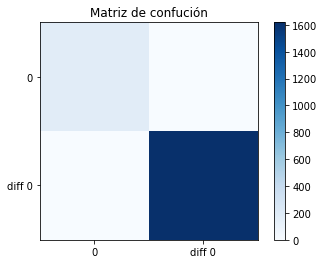

In [11]:
cm = metrics.confusion_matrix(y, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confución")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)

In [20]:
print("Exactitud: ", metrics.accuracy_score(y, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y, y_pred))
print("Especificidad: ", cm[0][0]/(cm[0][0]+cm[0][1]))


Exactitud:  1.0
Kappa:  1.0
Especificidad:  1.0


In [12]:
print("Reporte de clasificación:")
print(metrics.classification_report(y, y_pred, target_names=target_names))

Reporte de clasificación:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
     diff 0       1.00      1.00      1.00      1619

avg / total       1.00      1.00      1.00      1797

